**Goal of the Code:** Create a plot to show the differences in different variables between the three RFG scenarios. The scenarios are compared at the time where they reach +2° global mean temperature increase as compared to pre-industrial temperatures. They are considered above land north of 50°N. To underline the differences between the RFG methods, the value for when the RCP8.5 scenario reaches +2°C is subtracted.

In [16]:
import iris
import Fig_3_Mean_clm as Mean_Time_Series ## This script takes the nc files and calculates a weighted area average and a 21-year running mean which is returned as a list
import matplotlib.pyplot as plt
import matplotlib

import numpy as np
import pandas as pd

import scipy.stats as st

Define function to calculate running mean of a time series where x = array and w = time span of running mean.

In [17]:
def moving_average(x, w): # x = array, w = 21 years
    return np.convolve(x, np.ones(w), 'valid') / w

Assign all the variables that will be displayed in the plot. variable = variable short names that are in the files names, variable_name = variable long name that will be shown in the plot.

In [18]:
variable = ["FCTR", "LHFLX", "SHFLX", "FSNSC", "FSNS", "FLNSC", "FLNS"]
variable_name = ["Transpiration", "Latent Heat", "Sensible Heat", "SW Clear-Sky", "SW CF", "LW Clear-Sky", "LW CF"]

landmask = iris.load("TSA_01_sel_var_CCT.all.nc")[0][:,74:96,:]

CCT_bar = []
MSB_bar = []
SAI_bar = []
RCP_bar = []

variable_bar = []
error_bar = []
data = []
error = []

The Code will be iterated over all variables. Depending on the variable, they have to be treated differently. Cloud Forcing is calculated as Clear Sky - All Sky. Further, as outgoing radiation is defined as positive and ingoing radiation as negative, FSNS and FSNSC have to be converted to negative values as everything is positive in the original datasets. For each variable, the datasets are loaded and a landmask is applied. With Mean_Time_Series, the JJA mean of the region (here 74:96 $\rightarrow$ everything North of 50°N) is calculated as 21-year running mean for each ensemble. FCTR (Transpiration) does not require a landmask as it is only available over land anyway.

The sub programm Mean_Time_Series is used to create a cosine-weighted mean over the relevant area (here north of 50°N) and calculate the yearly mean of each dataset. The output is a 21-year running mean of each ensemble plus a 21-year running mean where the three ensembles are combined. For some variables, some further calculations have to be done:

- In the output of Nor-ESM1, the variables used in this analysis all have positive signs, no matter if the energy goes into or out of the Earth system. In our analysis we have defined outgoing fluxes as positive and incoming as negative. Thus, the values of the variables having to do with incoming shortwave radiation need to be assigned negative values [1]. 
- To calculate the cloud forcing, the all-sky value is subtracted from the clear-sky value at each time step [2].

After calculating the 21-year time series for each scenario, some additional caculations have to be executed:

- The mean of RCP8.5 where the scenario reaches +2° is calculated [4].
- The RFG ensembles are also considered at the time where they each reach +2°. The mean of when RCP8.5 reaches +2° calculated above is subtracted to display the difference of RFG and RCP8.5 [5].
- The 95% confidence intervals are calculated for each RFG [6].
- The mean value of the 21 years and the three ensembles as well as the 95% confidence intervals are stored for each RFG [7].

In [19]:
import warnings
warnings.filterwarnings("ignore") ## To ignore UserWarning about collapsing a non-contagious variable

for k in range(0, len(variable)):

    variable_bar.append(variable_name[k])
    
    if variable[k] == "FSNS":
        
        ## Shortwave Cloud Forcing ##
            
        CCT_01 = iris.load(variable[k-1] + "_01_sel_var_CCT_cam.all.nc")[0][12:,74:96,:]
        CCT_02 = iris.load(variable[k-1] + "_02_sel_var_CCT_cam.all.nc")[0][12:,74:96,:]
        CCT_03 = iris.load(variable[k-1] + "_03_sel_var_CCT_cam.all.nc")[0][:,74:96,:]
        CCT_01.data.mask = landmask.data.mask
        CCT_02.data.mask = landmask.data.mask
        CCT_03.data.mask = landmask.data.mask
        
        CCT_mean_A, CCT_01_A, CCT_02_A, CCT_03_A = Mean_Time_Series.rfg_mean_clm(CCT_01, CCT_02, CCT_03, "CCT")
        
        ## [1] assignment of negative values ##
        CCT_mean_A = [-x for x in CCT_mean_A]
        CCT_01_A = [ -x for x in CCT_01_A]
        CCT_02_A = [ -x for x in CCT_02_A]
        CCT_03_A = [ -x for x in CCT_03_A]
        
        MSB_01 = iris.load(variable[k-1] + "_01_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_02 = iris.load(variable[k-1] + "_02_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_03 = iris.load(variable[k-1] + "_03_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_01.data.mask = landmask.data.mask
        MSB_02.data.mask = landmask.data.mask
        MSB_03.data.mask = landmask.data.mask
        
        MSB_mean_A, MSB_01_A, MSB_02_A, MSB_03_A = Mean_Time_Series.rfg_mean_clm(MSB_01, MSB_02, MSB_03, "MSB")
        
        ## [1] assignment of negative values ##
        MSB_mean_A = [-x for x in MSB_mean_A]
        MSB_01_A = [ -x for x in MSB_01_A]
        MSB_02_A = [ -x for x in MSB_02_A]
        MSB_03_A = [ -x for x in MSB_03_A]
        
        SAI_01 = iris.load(variable[k-1] + "_01_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_02 = iris.load(variable[k-1] + "_02_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_03 = iris.load(variable[k-1] + "_03_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_01.data.mask = landmask.data.mask
        SAI_02.data.mask = landmask.data.mask
        SAI_03.data.mask = landmask.data.mask
        
        SAI_mean_A, SAI_01_A, SAI_02_A, SAI_03_A = Mean_Time_Series.rfg_mean_clm(SAI_01, SAI_02, SAI_03, "")
        
        ## [1] assignment of negative values ##
        SAI_mean_A = [-x for x in SAI_mean_A]
        SAI_01_A = [ -x for x in SAI_01_A]
        SAI_02_A = [ -x for x in SAI_02_A]
        SAI_03_A = [ -x for x in SAI_03_A]
        
        RCP = iris.load(variable[k-1] + "_sel_var_RCP85_cam.all.nc")[0][:,74:96,:]
        RCP.data.mask = landmask.data.mask
        
        RCP_mean_A = Mean_Time_Series.rcp_mean_clm(RCP, "")
        
        ## [1] assignment of negative values ##
        RCP_mean_A = [ -x for x in RCP_mean_A]
        
        CCT_01_C = iris.load(variable[k] + "_01_sel_var_CCT_cam.all.nc")[0][12:,74:96,:]
        CCT_02_C = iris.load(variable[k] + "_02_sel_var_CCT_cam.all.nc")[0][12:,74:96,:]
        CCT_03_C = iris.load(variable[k] + "_03_sel_var_CCT_cam.all.nc")[0][:,74:96,:]
        CCT_01_C.data.mask = landmask.data.mask
        CCT_02_C.data.mask = landmask.data.mask
        CCT_03_C.data.mask = landmask.data.mask
        
        CCT_mean_C, CCT_01_C, CCT_02_C, CCT_03_C = Mean_Time_Series.rfg_mean_clm(CCT_01_C, CCT_02_C, CCT_03_C, "CCT")
        
        ## [1] assignment of negative values ##
        CCT_mean_C = [-x for x in CCT_mean_C]
        CCT_01_C = [-x for x in CCT_01_C]
        CCT_02_C = [-x for x in CCT_02_C]
        CCT_03_C = [-x for x in CCT_03_C]
        
        MSB_01_C = iris.load(variable[k] + "_01_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_02_C = iris.load(variable[k] + "_02_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_03_C = iris.load(variable[k] + "_03_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_01_C.data.mask = landmask.data.mask
        MSB_02_C.data.mask = landmask.data.mask
        MSB_03_C.data.mask = landmask.data.mask
        
        MSB_mean_C, MSB_01_C, MSB_02_C, MSB_03_C = Mean_Time_Series.rfg_mean_clm(MSB_01_C, MSB_02_C, MSB_03_C, "MSB")
        
        ## [1] assignment of negative values ##
        MSB_mean_C = [-x for x in MSB_mean_C]
        MSB_01_C = [-x for x in MSB_01_C]
        MSB_02_C = [-x for x in MSB_02_C]
        MSB_03_C = [-x for x in MSB_03_C]
        
        SAI_01_C = iris.load(variable[k] + "_01_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_02_C = iris.load(variable[k] + "_02_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_03_C = iris.load(variable[k] + "_03_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_01_C.data.mask = landmask.data.mask
        SAI_02_C.data.mask = landmask.data.mask
        SAI_03_C.data.mask = landmask.data.mask
        
        SAI_mean_C, SAI_01_C, SAI_02_C, SAI_03_C = Mean_Time_Series.rfg_mean_clm(SAI_01_C, SAI_02_C, SAI_03_C, "")
        
        ## [1] assignment of negative values ##
        SAI_mean_C = [-x for x in SAI_mean_C]
        SAI_01_C = [-x for x in SAI_01_C]
        SAI_02_C = [-x for x in SAI_02_C]
        SAI_03_C = [-x for x in SAI_03_C]
        
        RCP_C = iris.load(variable[k] + "_sel_var_RCP85_cam.all.nc")[0][:,74:96,:]
        RCP_C.data.mask = landmask.data.mask
        
        RCP_mean_C = Mean_Time_Series.rcp_mean_clm(RCP_C, "")
        
        ## [1] assignment of negative values ##
        RCP_mean_C = [-x for x in RCP_mean_C]
        
        CCT_mean = []
        MSB_mean = []
        SAI_mean = []
        RCP_mean = []
        CCT_01 = []
        CCT_02 = []
        CCT_03 = []
        MSB_01 = []
        MSB_02 = []
        MSB_03 = []
        SAI_01 = []
        SAI_02 = []
        SAI_03 = []
        
        ## [2] Cloud forcing = clear-sks - all-sky ##
        for i in range(0, len(CCT_mean_C)):
            CCT_mean.append(CCT_mean_C[i] - CCT_mean_A[i])
            CCT_01.append(CCT_01_C[i] - CCT_01_A[i])
            CCT_02.append(CCT_02_C[i] - CCT_02_A[i])
            CCT_03.append(CCT_03_C[i] - CCT_03_A[i])
        
        for i in range(0, len(MSB_mean_C)):
            MSB_mean.append(MSB_mean_C[i] - MSB_mean_A[i])
            MSB_01.append(MSB_01_C[i] - MSB_01_A[i])
            MSB_02.append(MSB_02_C[i] - MSB_02_A[i])
            MSB_03.append(MSB_03_C[i] - MSB_03_A[i])
            SAI_mean.append(SAI_mean_C[i] - SAI_mean_A[i])
            SAI_01.append(SAI_01_C[i] - SAI_01_A[i])
            SAI_02.append(SAI_02_C[i] - SAI_02_A[i])
            SAI_03.append(SAI_03_C[i] - SAI_03_A[i])
        
        for i in range(0, len(RCP_mean_C)):
            RCP_mean.append(RCP_mean_C[i] - RCP_mean_A[i])
        
    elif variable[k] == "FLNS":
        
        ## Longwave Cloud Forcing ##
        
        CCT_01 = iris.load(variable[k-1] + "_01_sel_var_CCT_cam.all.nc")[0][12:,74:96,:]
        CCT_02 = iris.load(variable[k-1] + "_02_sel_var_CCT_cam.all.nc")[0][12:,74:96,:]
        CCT_03 = iris.load(variable[k-1] + "_03_sel_var_CCT_cam.all.nc")[0][:,74:96,:]
        CCT_01.data.mask = landmask.data.mask
        CCT_02.data.mask = landmask.data.mask
        CCT_03.data.mask = landmask.data.mask
        
        CCT_mean_A, CCT_01_A, CCT_02_A, CCT_03_A = Mean_Time_Series.rfg_mean_clm(CCT_01, CCT_02, CCT_03, "CCT")
        
        MSB_01 = iris.load(variable[k-1] + "_01_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_02 = iris.load(variable[k-1] + "_02_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_03 = iris.load(variable[k-1] + "_03_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_01.data.mask = landmask.data.mask
        MSB_02.data.mask = landmask.data.mask
        MSB_03.data.mask = landmask.data.mask
        
        MSB_mean_A, MSB_01_A, MSB_02_A, MSB_03_A = Mean_Time_Series.rfg_mean_clm(MSB_01, MSB_02, MSB_03, "MSB")
        
        SAI_01 = iris.load(variable[k-1] + "_01_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_02 = iris.load(variable[k-1] + "_02_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_03 = iris.load(variable[k-1] + "_03_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_01.data.mask = landmask.data.mask
        SAI_02.data.mask = landmask.data.mask
        SAI_03.data.mask = landmask.data.mask
        
        SAI_mean_A, SAI_01_A, SAI_02_A, SAI_03_A = Mean_Time_Series.rfg_mean_clm(SAI_01, SAI_02, SAI_03, "")
        
        RCP = iris.load(variable[k-1] + "_sel_var_RCP85_cam.all.nc")[0][:,74:96,:]
        RCP.data.mask = landmask.data.mask
        
        RCP_mean_A = Mean_Time_Series.rcp_mean_clm(RCP, "")
        
        CCT_01_C = iris.load(variable[k] + "_01_sel_var_CCT_cam.all.nc")[0][12:,74:96,:]
        CCT_02_C = iris.load(variable[k] + "_02_sel_var_CCT_cam.all.nc")[0][12:,74:96,:]
        CCT_03_C = iris.load(variable[k] + "_03_sel_var_CCT_cam.all.nc")[0][:,74:96,:]
        CCT_01_C.data.mask = landmask.data.mask
        CCT_02_C.data.mask = landmask.data.mask
        CCT_03_C.data.mask = landmask.data.mask
        
        CCT_mean_C, CCT_01_C, CCT_02_C, CCT_03_C = Mean_Time_Series.rfg_mean_clm(CCT_01_C, CCT_02_C, CCT_03_C, "CCT")
        
        MSB_01_C = iris.load(variable[k] + "_01_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_02_C = iris.load(variable[k] + "_02_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_03_C = iris.load(variable[k] + "_03_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_01_C.data.mask = landmask.data.mask
        MSB_02_C.data.mask = landmask.data.mask
        MSB_03_C.data.mask = landmask.data.mask
        
        MSB_mean_C, MSB_01_C, MSB_02_C, MSB_03_C = Mean_Time_Series.rfg_mean_clm(MSB_01_C, MSB_02_C, MSB_03_C, "MSB")
        
        SAI_01_C = iris.load(variable[k] + "_01_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_02_C = iris.load(variable[k] + "_02_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_03_C = iris.load(variable[k] + "_03_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_01_C.data.mask = landmask.data.mask
        SAI_02_C.data.mask = landmask.data.mask
        SAI_03_C.data.mask = landmask.data.mask
        
        SAI_mean_C, SAI_01_C, SAI_02_C, SAI_03_C = Mean_Time_Series.rfg_mean_clm(SAI_01_C, SAI_02_C, SAI_03_C, "")
        
        RCP_C = iris.load(variable[k] + "_sel_var_RCP85_cam.all.nc")[0][:,74:96,:]
        RCP_C.data.mask = landmask.data.mask
        
        RCP_mean_C = Mean_Time_Series.rcp_mean_clm(RCP_C, "")
        
        CCT_mean = []
        MSB_mean = []
        SAI_mean = []
        RCP_mean = []
        CCT_01 = []
        CCT_02 = []
        CCT_03 = []
        MSB_01 = []
        MSB_02 = []
        MSB_03 = []
        SAI_01 = []
        SAI_02 = []
        SAI_03 = []
        
        ## [2] Cloud forcing = clear-sky - all-sky ##
        for i in range(0, len(CCT_mean_C)):
            CCT_mean.append(CCT_mean_C[i] - CCT_mean_A[i])
            CCT_01.append(CCT_01_C[i] - CCT_01_A[i])
            CCT_02.append(CCT_02_C[i] - CCT_02_A[i])
            CCT_03.append(CCT_03_C[i] - CCT_03_A[i])
        
        for i in range(0, len(MSB_mean_C)):
            MSB_mean.append(MSB_mean_C[i] - MSB_mean_A[i])
            MSB_01.append(MSB_01_C[i] - MSB_01_A[i])
            MSB_02.append(MSB_02_C[i] - MSB_02_A[i])
            MSB_03.append(MSB_03_C[i] - MSB_03_A[i])
            SAI_mean.append(SAI_mean_C[i] - SAI_mean_A[i])
            SAI_01.append(SAI_01_C[i] - SAI_01_A[i])
            SAI_02.append(SAI_02_C[i] - SAI_02_A[i])
            SAI_03.append(SAI_03_C[i] - SAI_03_A[i])
        
        for i in range(0, len(RCP_mean_C)):
            RCP_mean.append(RCP_mean_C[i] - RCP_mean_A[i])
            
    elif variable[k] == "FSNSC":
        
        ## Shortwave forcing clear-sky ##
        
        CCT_01 = iris.loavariable[k] + "_01_sel_var_CCT_cam.all.nc")[0][12:,74:96,:]
        CCT_02 = iris.loavariable[k] + "_02_sel_var_CCT_cam.all.nc")[0][12:,74:96,:]
        CCT_03 = iris.loavariable[k] + "_03_sel_var_CCT_cam.all.nc")[0][:,74:96,:]
        CCT_01.data.mask = landmask.data.mask
        CCT_02.data.mask = landmask.data.mask
        CCT_03.data.mask = landmask.data.mask
        
        CCT_mean, CCT_01, CCT_02, CCT_03 = Mean_Time_Series.rfg_mean_clm(CCT_01, CCT_02, CCT_03, "CCT")
        
        ## [1] assignment of negative values ##
        CCT_mean = [-x for x in CCT_mean]
        CCT_01 = [-x for x in CCT_01]
        CCT_02 = [-x for x in CCT_02]
        CCT_03 = [-x for x in CCT_03]
        
        MSB_01 = iris.loavariable[k] + "_01_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_02 = iris.loavariable[k] + "_02_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_03 = iris.loavariable[k] + "_03_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_01.data.mask = landmask.data.mask
        MSB_02.data.mask = landmask.data.mask
        MSB_03.data.mask = landmask.data.mask
        
        MSB_mean, MSB_01, MSB_02, MSB_03 = Mean_Time_Series.rfg_mean_clm(MSB_01, MSB_02, MSB_03, "MSB")
        
        ## [1] assignment of negative values ##
        MSB_mean = [-x for x in MSB_mean]
        MSB_01 = [-x for x in MSB_01]
        MSB_02 = [-x for x in MSB_02]
        MSB_03 = [-x for x in MSB_03]
        
        SAI_01 = iris.loavariable[k] + "_01_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_02 = iris.loavariable[k] + "_02_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_03 = iris.loavariable[k] + "_03_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_01.data.mask = landmask.data.mask
        SAI_02.data.mask = landmask.data.mask
        SAI_03.data.mask = landmask.data.mask
        
        SAI_mean, SAI_01, SAI_02, SAI_03 = Mean_Time_Series.rfg_mean_clm(SAI_01, SAI_02, SAI_03, "")
        
        ## [1] assignment of negative values
        SAI_mean = [-x for x in SAI_mean]
        SAI_01 = [-x for x in SAI_01]
        SAI_02 = [-x for x in SAI_02]
        SAI_03 = [-x for x in SAI_03]
        
        RCP = iris.loavariable[k] + "_sel_var_RCP85_cam.all.nc")[0][:,74:96,:]
        RCP.data.mask = landmask.data.mask
        
        RCP_mean = Mean_Time_Series.rcp_mean_clm(RCP, "")
        
        ## [1] assignment of negative values ##
        RCP_mean = [-x for x in RCP_mean]
        
    elif variable[k] == "FCTR":
        
        ## Transpiration ##
        
        CCT_01 = iris.loadvariable[k] + "_01_sel_var_CCT.all.nc")[0][12:,74:96,:]
        CCT_02 = iris.loadvariable[k] + "_02_sel_var_CCT.all.nc")[0][12:,74:96,:]
        CCT_03 = iris.loadvariable[k] + "_03_sel_var_CCT.all.nc")[0][:,74:96,:]

        CCT_mean, CCT_01, CCT_02, CCT_03 = Mean_Time_Series.rfg_mean_clm(CCT_01, CCT_02, CCT_03, "")
        
        MSB_01 = iris.loadvariable[k] + "_01_sel_var_MSB.all.nc")[0][:,74:96,:]
        MSB_02 = iris.loadvariable[k] + "_02_sel_var_MSB.all.nc")[0][:,74:96,:]
        MSB_03 = iris.loadvariable[k] + "_03_sel_var_MSB.all.nc")[0][:,74:96,:]

        MSB_mean, MSB_01, MSB_02, MSB_03 = Mean_Time_Series.rfg_mean_clm(MSB_01, MSB_02, MSB_03, "")
        
        SAI_01 = iris.loadvariable[k] + "_01_sel_var_SAI.all.nc")[0][:,74:96,:]
        SAI_02 = iris.loadvariable[k] + "_02_sel_var_SAI.all.nc")[0][:,74:96,:]
        SAI_03 = iris.loadvariable[k] + "_03_sel_var_SAI.all.nc")[0][:,74:96,:]

        SAI_mean, SAI_01, SAI_02, SAI_03 = Mean_Time_Series.rfg_mean_clm(SAI_01, SAI_02, SAI_03, "")
        
        RCP = iris.loadvariable[k] + "_sel_var_RCP85.all.nc")[0][:,74:96,:]
        
        RCP_mean = Mean_Time_Series.rcp_mean_clm(RCP, "")
        
    else: 
        
        ## Latent Heat, Sensible Heat, Longwave frocing clear-sky
        
        CCT_01 = iris.load(variable[k] + "_01_sel_var_CCT_cam.all.nc")[0][12:,74:96,:]
        CCT_02 = iris.load(variable[k] + "_02_sel_var_CCT_cam.all.nc")[0][12:,74:96,:]
        CCT_03 = iris.load(variable[k] + "_03_sel_var_CCT_cam.all.nc")[0][:,74:96,:]
        CCT_01.data.mask = landmask.data.mask
        CCT_02.data.mask = landmask.data.mask
        CCT_03.data.mask = landmask.data.mask
        
        CCT_mean, CCT_01, CCT_02, CCT_03 = Mean_Time_Series.rfg_mean_clm(CCT_01, CCT_02, CCT_03, "CCT")
        
        MSB_01 = iris.load(variable[k] + "_01_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_02 = iris.load(variable[k] + "_02_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_03 = iris.load(variable[k] + "_03_sel_var_MSB_cam.all.nc")[0][:,74:96,:]
        MSB_01.data.mask = landmask.data.mask
        MSB_02.data.mask = landmask.data.mask
        MSB_03.data.mask = landmask.data.mask
        
        MSB_mean, MSB_01, MSB_02, MSB_03 = Mean_Time_Series.rfg_mean_clm(MSB_01, MSB_02, MSB_03, "MSB")
        
        SAI_01 = iris.load(variable[k] + "_01_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_02 = iris.load(variable[k] + "_02_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_03 = iris.load(variable[k] + "_03_sel_var_SAI_cam.all.nc")[0][:,74:96,:]
        SAI_01.data.mask = landmask.data.mask
        SAI_02.data.mask = landmask.data.mask
        SAI_03.data.mask = landmask.data.mask
        
        SAI_mean, SAI_01, SAI_02, SAI_03 = Mean_Time_Series.rfg_mean_clm(SAI_01, SAI_02, SAI_03, "")
        
        RCP = iris.load(variable[k] + "_sel_var_RCP85_cam.all.nc")[0][:,74:96,:]
        RCP.data.mask = landmask.data.mask
        
        RCP_mean = Mean_Time_Series.rcp_mean_clm(RCP, "")
    
    
    ## -- End of creating time series -- ##

    ## [3] where RCP8.5 reaches +2° ##
    RCP_Diff = []
    for m in range(0, 21):
        RCP_Diff.append((RCP_mean[34+m]))
    
    RCP_mean = np.mean(RCP_Diff[0:21])
    
    CCT_01_RC = []
    CCT_02_RC = []
    CCT_03_RC = []
    CCT_ens_Dif = []
    
    ## [4] where RFGs reach +2°; as difference to RCP8.5 ##
    for m in range(0, 21):
        CCT_01_RC.append((CCT_01[41+m])  - RCP_mean)
        CCT_02_RC.append((CCT_02[37+m])  - RCP_mean)
        CCT_03_RC.append((CCT_03[40+m])  - RCP_mean)

    CCT_ens_Diff = CCT_01_RC[:] + CCT_02_RC[:] + CCT_03_RC[:]
    
    MSB_01_RC = []
    MSB_02_RC = []
    MSB_03_RC = []
    MSB_ens_Diff = []
    
    ## [4] where RFGs reach +2°; as difference to RCP8.5 ##
    for m in range(0, 21):
        MSB_01_RC.append((MSB_01[42+m])  - RCP_mean)
        MSB_02_RC.append((MSB_02[37+m])  - RCP_mean)
        MSB_03_RC.append((MSB_03[38+m])  - RCP_mean)

    MSB_ens_Diff = MSB_01_RC[:] + MSB_02_RC[:] + MSB_03_RC[:]
    
    SAI_01_RC = []
    SAI_02_RC = []
    SAI_03_RC = []
    SAI_ens_Diff = []
    
    ## [4] where RFGs reach +2°; as difference to RCP8.5 ##
    for m in range(0, 21):
        SAI_01_RC.append((SAI_01[36+m])  - RCP_mean)
        SAI_02_RC.append((SAI_02[37+m])  - RCP_mean)
        SAI_03_RC.append((SAI_03[37+m])  - RCP_mean)

    SAI_ens_Diff = SAI_01_RC[:] + SAI_02_RC[:] + SAI_03_RC[:]
        
    ## [5] 95% confidence intervals ##
    CCT_CI = st.t.interval(0.95, len(CCT_ens_Diff)-1, loc=np.mean(CCT_ens_Diff), scale=st.sem(CCT_ens_Diff))
    MSB_CI = st.t.interval(0.95, len(MSB_ens_Diff)-1, loc=np.mean(MSB_ens_Diff), scale=st.sem(MSB_ens_Diff))
    SAI_CI = st.t.interval(0.95, len(SAI_ens_Diff)-1, loc=np.mean(SAI_ens_Diff), scale=st.sem(SAI_ens_Diff))
    
    CCT_error = CCT_CI[1] - CCT_CI[0]
    MSB_error = MSB_CI[1] - MSB_CI[0]
    SAI_error = SAI_CI[1] - SAI_CI[0]
    
    error_bar.append(CCT_error)
    error_bar.append(MSB_error)
    error_bar.append(SAI_error)

    variable_bar.append((np.mean(CCT_01_RC[0:21]) + np.mean(CCT_02_RC[0:21]) + np.mean(CCT_03_RC[0:21])) / 3)
    variable_bar.append((np.mean(MSB_01_RC[0:21]) + np.mean(MSB_02_RC[0:21]) + np.mean(MSB_03_RC[0:21])) / 3)
    variable_bar.append((np.mean(SAI_01_RC[0:21]) + np.mean(SAI_02_RC[0:21]) + np.mean(SAI_03_RC[0:21])) / 3)
    
    ## [6] storing of data ##
    data.append(variable_bar)
    error.append(error_bar)
    
    variable_bar = []
    error_bar = []

The lists of data created above are transformed to data frames.

In [20]:
df = pd.DataFrame(data, columns = ["variable", "CCT", "MSB", "SAI"])
df_error = pd.DataFrame(error, columns = ["CCT", "MSB", "SAI"])
scenarios = ["CCT", "MSB", "SAI"]

Plotting of the data.

Text(0.5, 1.0, 'Difference in energy budget components >50°N (RFGs - RCP8.5)')

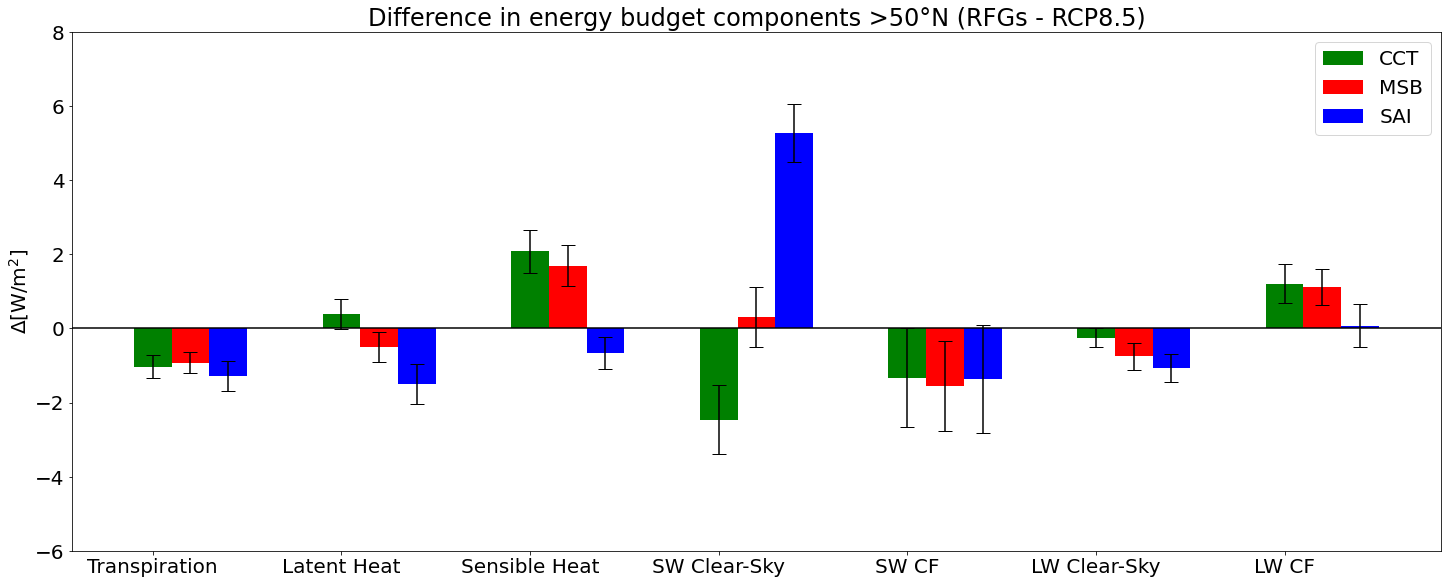

In [21]:
matplotlib.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(figsize=(20,8), constrained_layout = True)
X = np.arange(7)

plt.bar(X + 0.00, df["CCT"], yerr = df_error["CCT"], capsize=7, ecolor='black', color = 'g', width = 0.2, label = "CCT")
plt.bar(X + 0.2, df["MSB"], yerr = df_error["MSB"], capsize=7, ecolor='black', color = 'r', width = 0.2, label = "MSB")
plt.bar(X + 0.4, df["SAI"], yerr = df_error["SAI"], capsize=7, ecolor='black', color = 'b', width = 0.2, label = "SAI")
plt.xlabel(None)
plt.xticks(df.index, df["variable"])
plt.ylabel("$\Delta$[W/m$^2$]")
plt.yticks()
plt.legend()
plt.ylim(-6, 8)
plt.axhline(y=0, color='k', linestyle='-')
plt.title("Difference in energy budget components >50°N (RFGs - RCP8.5)")